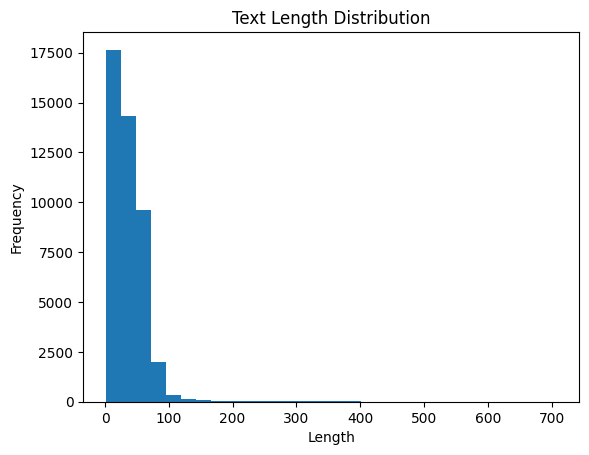


▶ speaker 분포:
speaker
0    23281
1    21238
Name: count, dtype: int64

▶ file_name 정렬 예시:
0    phishing_1368
1    phishing_1368
2    phishing_1368
3    phishing_1368
4    phishing_1368
5    phishing_1368
6    phishing_1368
7    phishing_1368
8    phishing_1368
9    phishing_1368
Name: file_name, dtype: object
정렬 상태: 정렬 필요


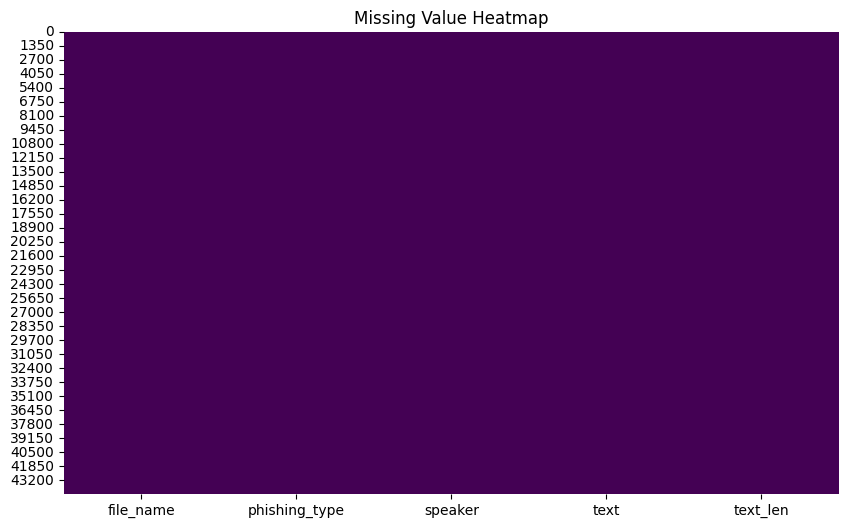


📌 변수 요약표:
              Data Type  Missing (%)  Unique Values  \
file_name        object          0.0           2047   
phishing_type    object          0.0             19   
speaker           int64          0.0              2   
text             object          0.0          39686   

                                                   Example Value  
file_name                                          phishing_1368  
phishing_type                                              기관사칭형  
speaker                                                        0  
text           그 본인께서 직접 통장 계산한 사실은 없으신 거죠. 네, 그리고 저희가 김성태를 조...  

🔁 중복 행 수: 2087


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 경로
df = pd.read_csv("C:/Users/user/Downloads/0708/woogawooga_project/dataset_create/Chaeyeon/phishing_total.csv")

# 1. 변수 요약
summary = pd.DataFrame({
    'Data Type': df.dtypes,
    'Missing (%)': df.isnull().mean() * 100,
    'Unique Values': df.nunique(),
    'Example Value': df.apply(lambda x: x.dropna().unique()[0] if x.dropna().size > 0 else 'N/A')
})

# 2. 텍스트 길이 분석
if 'text' in df.columns:
    df['text_len'] = df['text'].astype(str).str.len()
    text_stats = df['text_len'].describe()
    plt.hist(df['text_len'], bins=30)
    plt.title("Text Length Distribution")
    plt.xlabel("Length")
    plt.ylabel("Frequency")
    plt.show()

# 3. 중복 행 수
duplicates = df.duplicated(subset=['file_name', 'text']).sum()

# 4. 범주형 값 분포
for col in ['speaker', 'label', 'type']:
    if col in df.columns:
        print(f"\n▶ {col} 분포:")
        print(df[col].value_counts(dropna=False))

# 5. 정렬 확인
if 'file_name' in df.columns:
    print("\n▶ file_name 정렬 예시:")
    print(df['file_name'].head(10))
    try:
        sorted_check = df['file_name'].sort_values().reset_index(drop=True).equals(df['file_name'].reset_index(drop=True))
        print("정렬 상태:", "정상" if sorted_check else "정렬 필요")
    except:
        print("file_name이 문자열로 인식되지 않음")

# 6. 결측치 히트맵 (옵션)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()

# 7. 요약 출력
print("\n📌 변수 요약표:")
print(summary)
print(f"\n🔁 중복 행 수: {duplicates}")


📊 대화당 총 텍스트 길이 통계:
count     2047.00000
mean       784.94724
std       1895.63509
min         20.00000
25%        118.00000
50%        187.00000
75%        501.00000
max      23615.00000
Name: total_text_len, dtype: float64


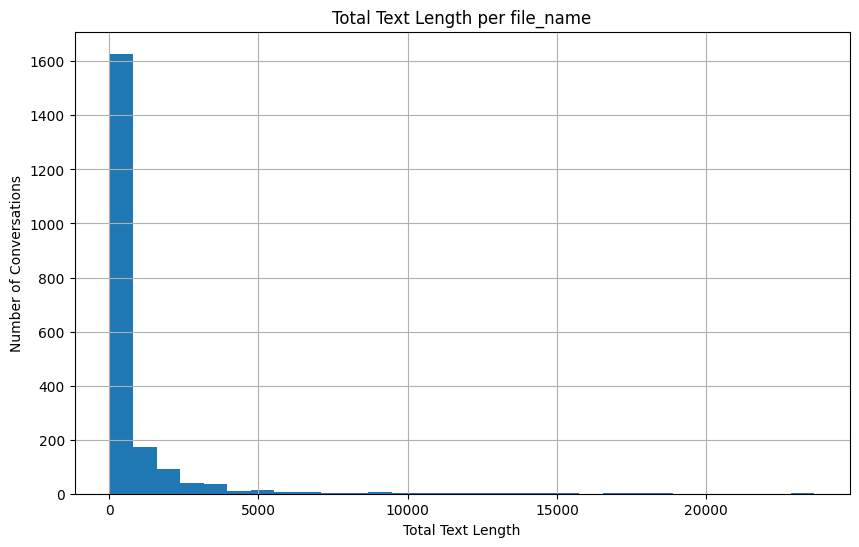

In [2]:
# file_name 별로 총 길이 합산
total_length_by_file = df.groupby("file_name")["text_len"].sum().reset_index()
total_length_by_file.rename(columns={"text_len": "total_text_len"}, inplace=True)

# 기초 통계 출력
print("📊 대화당 총 텍스트 길이 통계:")
print(total_length_by_file["total_text_len"].describe())

# 히스토그램으로 분포 시각화
plt.figure(figsize=(10, 6))
plt.hist(total_length_by_file["total_text_len"], bins=30)
plt.title("Total Text Length per file_name")
plt.xlabel("Total Text Length")
plt.ylabel("Number of Conversations")
plt.grid(True)
plt.show()

In [17]:
df = pd.read_csv("C:/Users/user/Downloads/0708/woogawooga_project/dataset_create/Chaeyeon/phishing_total_sorted.csv")

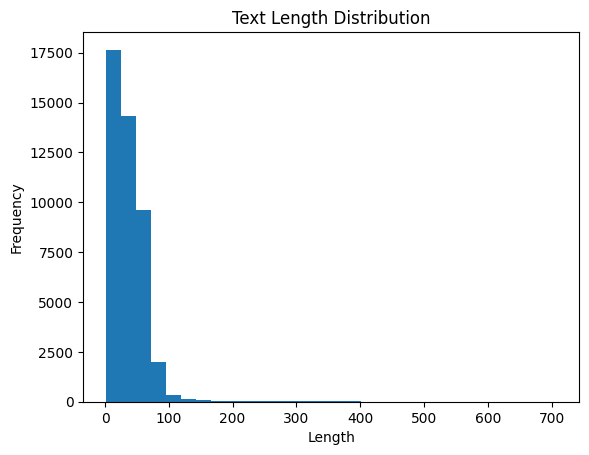

📊 대화당 총 텍스트 길이 통계:
count     2047.00000
mean       784.94724
std       1895.63509
min         20.00000
25%        118.00000
50%        187.00000
75%        501.00000
max      23615.00000
Name: total_text_len, dtype: float64


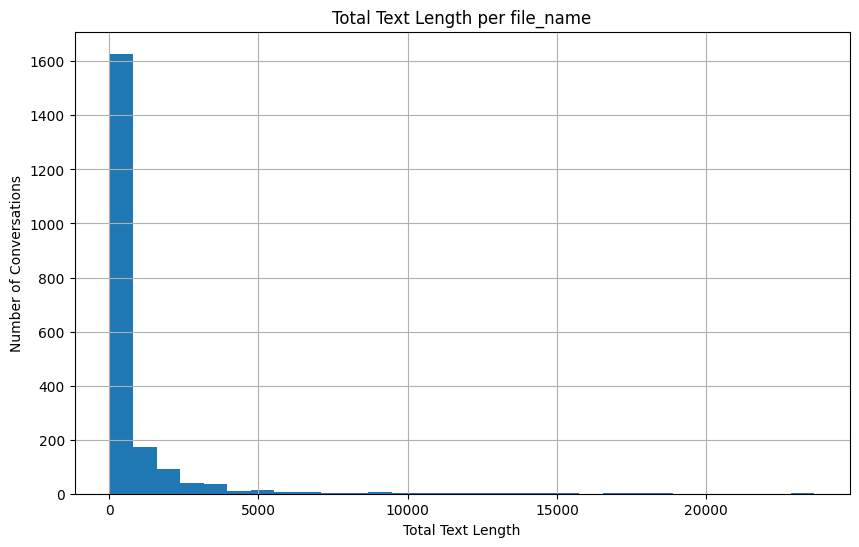

In [19]:
# 2. 텍스트 길이 분석
if 'text' in df.columns:
    df['text_len'] = df['text'].astype(str).str.len()
    text_stats = df['text_len'].describe()
    plt.hist(df['text_len'], bins=30)
    plt.title("Text Length Distribution")
    plt.xlabel("Length")
    plt.ylabel("Frequency")
    plt.show()
    
# file_name 별로 총 길이 합산
total_length_by_file = df.groupby("file_name")["text_len"].sum().reset_index()
total_length_by_file.rename(columns={"text_len": "total_text_len"}, inplace=True)

# 기초 통계 출력
print("📊 대화당 총 텍스트 길이 통계:")
print(total_length_by_file["total_text_len"].describe())

# 히스토그램으로 분포 시각화
plt.figure(figsize=(10, 6))
plt.hist(total_length_by_file["total_text_len"], bins=30)
plt.title("Total Text Length per file_name")
plt.xlabel("Total Text Length")
plt.ylabel("Number of Conversations")
plt.grid(True)
plt.show()

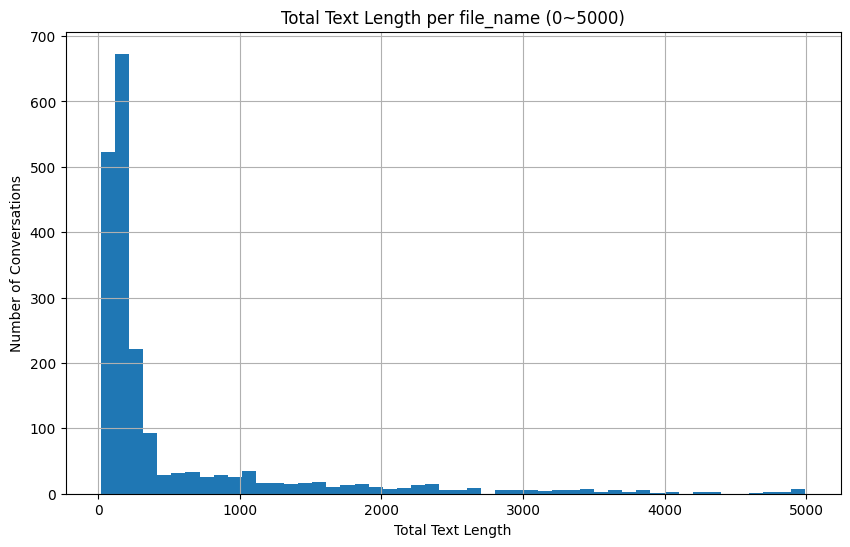

In [20]:
# 2. 특정 범위(예: 0~5000)만 필터링
filtered = total_length_by_file[total_length_by_file["total_text_len"] <= 5000]

# 3. 히스토그램 그리기
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# bins=50: 구간을 50개로 나눔 (기본은 10개라 너무 뭉침)
plt.hist(filtered["total_text_len"], bins=50)

plt.title("Total Text Length per file_name (0~5000)")
plt.xlabel("Total Text Length")
plt.ylabel("Number of Conversations")
plt.grid(True)
plt.show()

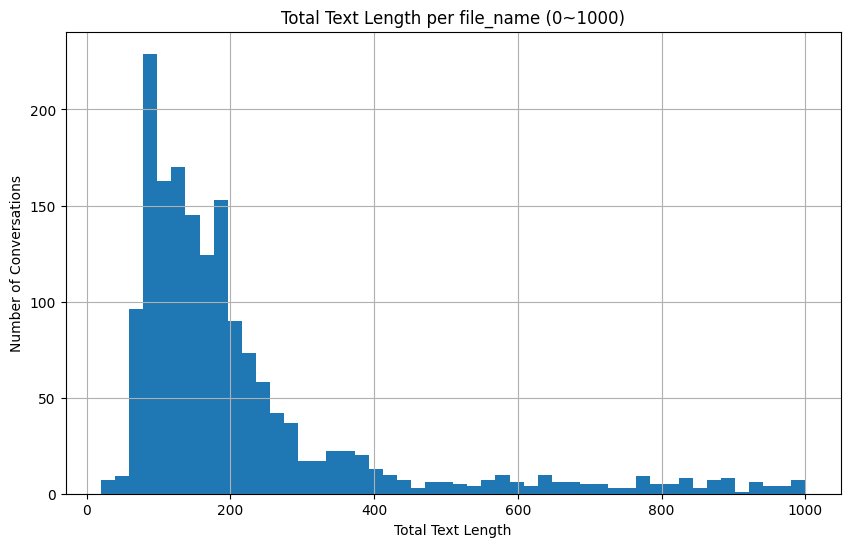

In [21]:
# 2. 특정 범위(예: 0~1000)만 필터링
filtered = total_length_by_file[total_length_by_file["total_text_len"] <= 1000]

# 3. 히스토그램 그리기
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# bins=50: 구간을 50개로 나눔 (기본은 10개라 너무 뭉침)
plt.hist(filtered["total_text_len"], bins=50)

plt.title("Total Text Length per file_name (0~1000)")
plt.xlabel("Total Text Length")
plt.ylabel("Number of Conversations")
plt.grid(True)
plt.show()

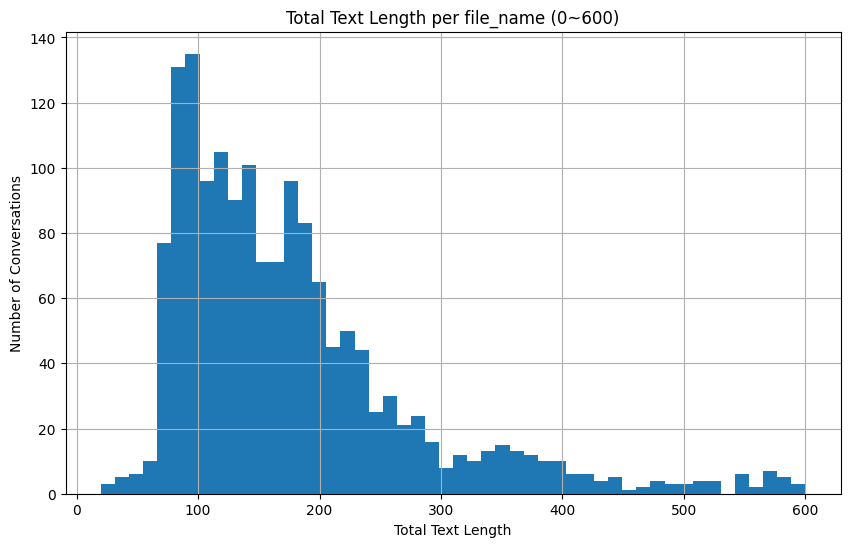

In [22]:
# 2. 특정 범위(예: 0~600)만 필터링
filtered = total_length_by_file[total_length_by_file["total_text_len"] <= 600]

# 3. 히스토그램 그리기
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# bins=50: 구간을 50개로 나눔 (기본은 10개라 너무 뭉침)
plt.hist(filtered["total_text_len"], bins=50)

plt.title("Total Text Length per file_name (0~600)")
plt.xlabel("Total Text Length")
plt.ylabel("Number of Conversations")
plt.grid(True)
plt.show()

In [23]:
# 3. 구간 설정 (0~999, 1000~1999, ..., 9000~9999, 10000 이상)
bins = list(range(0, 10001, 1000)) + [float("inf")]  # [0,1000,2000,...,10000,inf]
labels = [f"{bins[i]}~{bins[i+1]-1}" for i in range(len(bins)-2)] + ["10000+"]

# 4. 각 file_name을 구간에 할당
total_length_by_file["length_range"] = pd.cut(
    total_length_by_file["total_text_len"],
    bins=bins,
    labels=labels,
    right=False  # 1000~1999 형태로 만들기 위해 오른쪽 미포함
)

# 5. 구간별 백분율 계산
range_distribution = total_length_by_file["length_range"].value_counts(normalize=True).sort_index() * 100

# 6. 보기 좋게 출력
range_distribution = range_distribution.reset_index()
range_distribution.columns = ["length_range", "percentage"]

print(range_distribution)

   length_range  percentage
0         0~999   82.022472
1     1000~1999    8.304836
2     2000~2999    3.663898
3     3000~3999    2.247191
4     4000~4999    1.025892
5     5000~5999    0.488520
6     6000~6999    0.390816
7     7000~7999    0.244260
8     8000~8999    0.244260
9     9000~9999    0.146556
10       10000+    1.221299


In [24]:
# 3. 0~1000을 10개 구간으로 나누기
bins = list(range(0, 1001, 100)) + [float("inf")]  # [0,100,200,...,1000,inf]
labels = [f"{bins[i]}~{bins[i+1]-1}" for i in range(len(bins)-2)] + ["1000+"]

# 4. 구간 할당
total_length_by_file["length_range"] = pd.cut(
    total_length_by_file["total_text_len"],
    bins=bins,
    labels=labels,
    right=False
)

# 5. 구간별 백분율 계산
range_distribution = total_length_by_file["length_range"].value_counts(normalize=True).sort_index() * 100

# 6. 보기 좋게 출력
range_distribution = range_distribution.reset_index()
range_distribution.columns = ["length_range", "percentage"]

print(range_distribution)

   length_range  percentage
0          0~99   17.000489
1       100~199   37.567171
2       200~299   13.825110
3       300~399    4.836346
4       400~499    1.758671
5       500~599    1.563263
6       600~699    1.514411
7       700~799    1.319003
8       800~899    1.563263
9       900~999    1.074744
10        1000+   17.977528
